In [1]:
import json
import yaml
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
config = yaml.safe_load(open("/gscratch/balazinska/enhaoz/VOCAL-UDF/configs/config.yaml", "r"))

import re
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

######## gpt-4-1106-preview ########
task_0_new_udfs_mean_accuracy: -1.0
task_0_new_udfs_mean_f1: 0.9686245392484696
task_0_new_udfs_mean_precision: -1.0
task_0_new_udfs_mean_recall: -1.0
task_0_new_udfs_prob_failures: 0.0

task_1_new_udfs_mean_accuracy: -1.0
task_1_new_udfs_mean_f1: 0.5198873284349611
task_1_new_udfs_mean_precision: -1.0
task_1_new_udfs_mean_recall: -1.0
task_1_new_udfs_prob_failures: 0.0

task_2_new_udfs_mean_accuracy: -1.0
task_2_new_udfs_mean_f1: 0.3935364160428382
task_2_new_udfs_mean_precision: -1.0
task_2_new_udfs_mean_recall: -1.0
task_2_new_udfs_prob_failures: 0.0

task_3_new_udfs_mean_accuracy: -1.0
task_3_new_udfs_mean_f1: 0.06025554477441301
task_3_new_udfs_mean_precision: -1.0
task_3_new_udfs_mean_recall: -1.0
task_3_new_udfs_prob_failures: 0.0

######## equi-vocal ########
task_0_new_udfs_mean_accuracy: -1.0
task_0_new_udfs_mean_f1: 0.956079601423971
task_0_new_udfs_mean_precision: -1.0
task_0_new_udfs_mean_recall: -1.0
task_0_new_udfs_prob_failures: 0.0


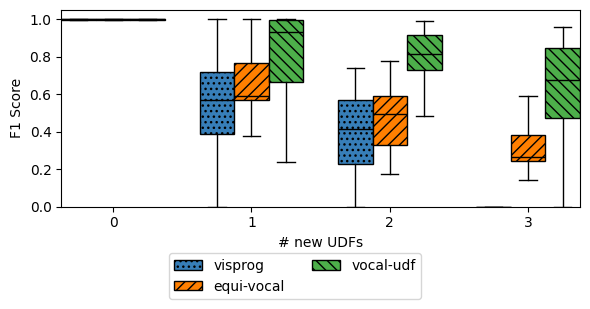

In [15]:
# Define LLM models, tasks, number of new UDFs, and hatch patterns
llm_models = ['gpt-4-1106-preview', 'equi-vocal', 'vocal-udf']
llm_model_labels = ['visprog', 'equi-vocal', 'vocal-udf']
query_class_names = [
    "3_new_udfs_labels",
    ]
num_new_udfs = [0, 1, 2, 3]
hatch_patterns = ['...', '///', '\\\\\\', 'xxx', '***', '+++', '|||', '---', 'ooo']
handles_f1 = []

# Create a figure and axis for the boxplot
fig, ax = plt.subplots(1, 1, figsize=(6, 2.7))  # Adjust the figsize as needed

# Iterate through LLM models
for i, llm_model in enumerate(llm_models):
    print(f"######## {llm_model} ########")
    f1_data = []

    # Iterate through tasks
    for task_id in num_new_udfs:
        task = f"{task_id}_new_udfs"
        accuracy_list = []
        f1_list = []
        precision_list = []
        recall_list = []
        failed_list = []

        # Iterate through runs and questions
        if llm_model in ["unavailable_removed"]:
            for query_class_name in query_class_names:
                if task_id != 0:
                    for question_id in range(10):
                        with open(os.path.join(config['log_dir'], "query_execution", "clevrer", f"num_missing_udfs={task_id}", "queries_unavailable_udfs_removed", f"qid={question_id}.log"), "r") as f:
                            last_line = f.readlines()[-1]
                        f1_score_pattern = r"F1 score: ([0-9.]+)"
                        match = re.search(f1_score_pattern, last_line)
                        f1_score = float(match.group(1))
                        f1_list.append(f1_score)
        elif llm_model in ['vocal-udf']:
            for query_class_name in query_class_names:
                for run_id in range(3):
                    for question_id in range(10):
                        try:
                            with open(os.path.join(config['log_dir'], "query_execution", "clevrer", query_class_name, f"num_missing_udfs={task_id}", "ninterp=10-nparams=5-kwargs=True-pixels=True-pretrained_models=False-ntrain_distill=100-nselection_samples=500-selection=both-labels=user-budget=20-llm_method=gpt4v", f"qid={question_id}-run={run_id}.log"), "r") as f:
                                lines = f.readlines()
                            f1_score = -1
                            for line in lines:
                                if "F1 score:" in line:
                                    f1_score_pattern = r"F1 score: ([0-9.]+)"
                                    match = re.search(f1_score_pattern, line)
                                    f1_score = float(match.group(1))
                                    failed_list.append(0)
                                    break
                            if f1_score == -1:
                                print(f"failed task: qid={question_id}-run={run_id}")
                                failed_list.append(1)
                                f1_score = 0
                            f1_list.append(f1_score)
                            accuracy_list.append(-1)
                            precision_list.append(-1)
                            recall_list.append(-1)
                        except Exception as e:
                            print(e)
                            continue

        elif llm_model in ["equi-vocal"]:
            for query_class_name in query_class_names:
                for run_id in range(3):
                    for question_id in range(10):
                        try:
                            with open(os.path.join(config['log_dir'], "query_execution", "clevrer", query_class_name, f"num_missing_udfs={task_id}", llm_model, f"qid={question_id}-run={run_id}.log"), "r") as f:
                                lines = f.readlines()
                            f1_score = -1
                            for line in lines:
                                if "F1 score:" in line:
                                    f1_score_pattern = r"F1 score: ([0-9.]+)"
                                    match = re.search(f1_score_pattern, line)
                                    f1_score = float(match.group(1))
                                    failed_list.append(0)
                                    break
                            if f1_score == -1:
                                print(f"failed task: qid={question_id}-run={run_id}")
                                failed_list.append(1)
                                f1_score = 0
                            f1_list.append(f1_score)
                            accuracy_list.append(-1)
                            precision_list.append(-1)
                            recall_list.append(-1)
                        except Exception as e:
                            print(e)
                            continue

        else:
            for query_class_name in query_class_names:
                for run_id in range(3):
                    for question_id in range(10):
                        try:
                            with open(os.path.join(config['log_dir'], "query_execution", "clevrer", query_class_name, f"num_missing_udfs={task_id}", "visprog-llm=gpt-4-turbo-2024-04-09", f"qid={question_id}-run={run_id}.log"), "r") as f:
                                lines = f.readlines()
                            f1_score = -1
                            for line in lines:
                                if "F1: " in line:
                                    f1_score_pattern = r"F1: ([0-9.]+)"
                                    match = re.search(f1_score_pattern, line)
                                    f1_score = float(match.group(1))
                                    failed_list.append(0)
                                    break
                            if f1_score == -1:
                                print(f"failed task: qid={question_id}-run={run_id}")
                                failed_list.append(1)
                                f1_score = 0
                            f1_list.append(f1_score)
                            accuracy_list.append(-1)
                            precision_list.append(-1)
                            recall_list.append(-1)
                        except Exception as e:
                            print(e)
                            continue


        f1_data.append(f1_list)
        print(f"task_{task}_mean_accuracy: {np.mean(accuracy_list)}")
        print(f"task_{task}_mean_f1: {np.mean(f1_list)}")
        print(f"task_{task}_mean_precision: {np.mean(precision_list)}")
        print(f"task_{task}_mean_recall: {np.mean(recall_list)}")
        print(f"task_{task}_prob_failures: {np.mean(failed_list)}")
        print()

    # Create a grouped boxplot for F1 scores
    bp_f1 = ax.boxplot(f1_data,
                       positions=np.array(range(len(f1_data))) * (len(llm_models) + 1) + i,
                       sym='.',
                       widths=1,
                       showfliers=False,
                       patch_artist=True,
                       boxprops=dict(facecolor=CB_color_cycle[i], hatch=hatch_patterns[i]),
                       medianprops=dict(color='black'))
    handles_f1.append(bp_f1["boxes"][0])

# Customize the plot labels and legend
ax.set(ylabel="F1 Score")
ax.set(xlabel="# new UDFs")
ax.set_ylim(bottom=0, top=1.05)
ax.set_xticks(np.arange(len(llm_models) / 2 - 0.5, len(num_new_udfs) * len(llm_models) + len(llm_models) / 2 + 0.5, len(llm_models) + 1))
ax.set_xticklabels(num_new_udfs)
fig.legend(handles_f1, llm_model_labels, prop={"size": 10}, loc='upper center', bbox_to_anchor=(0.5, 0.07),
           fancybox=True, shadow=False, ncol=2)
plt.subplots_adjust(bottom=0.15)
fig.tight_layout()
plt.show()
fig.savefig("eval_clevrer.pdf", bbox_inches='tight')